<a href="https://colab.research.google.com/github/el710/Colab/blob/main/%D0%94%D0%97_1_HW_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



    Сохранение и совместное использование:
        Сохраните ваш документ на Google Диске.
        Настройте доступ к документу для общего использования и отправьте ссылку вашему преподавателю.


Google colab provide a way to learn Python with form of notebooks

In [ ]:
print(f"Vivat Google Colaboratory!")

Vivat Google Colaboratory!


Основы Python:

In [ ]:
import random

my_list = [random.randint(10, 20) for _ in range(10)]

def items_sum(list):
    return sum(list)

print(f"list: {my_list}")
print(f"Sum of list items = {items_sum(my_list)}")

list: [10, 19, 15, 20, 12, 10, 16, 17, 15, 19]
Sum of list items = 153


Работа с библиотеками:

In [ ]:
import numpy as np

arr = np.linspace(0, 100, 100 // 5, dtype=np.int32)
print(f"array: {arr} - {arr.size} items")
print(f"average: {arr.mean()}")

array: [  0   5  10  15  21  26  31  36  42  47  52  57  63  68  73  78  84  89
  94 100] - 20 items
average: 49.55


Загрузка данных:

In [ ]:
import pandas as pd
import os

# print(os.getcwd())

data_frame = pd.read_csv("./sheet.csv", sep=';')

for i in range(5):
  print(data_frame.loc[i].to_json())

{"login":"github-actions[bot]","repo_name":"zhaobudaomingzi\/lobe-chat","type":"PushEvent"}
{"login":"ingo-h","repo_name":"UPnPsdk\/UPnPsdk","type":"PushEvent"}
{"login":"github-actions[bot]","repo_name":"yaperson\/yaperson","type":"PushEvent"}
{"login":"github-actions[bot]","repo_name":"diotoborg\/facere-accusamus","type":"PushEvent"}
{"login":"dependabot[bot]","repo_name":"media-streaming-mesh\/mediastreamingmesh.io","type":"DeleteEvent"}


Визуализация данных:

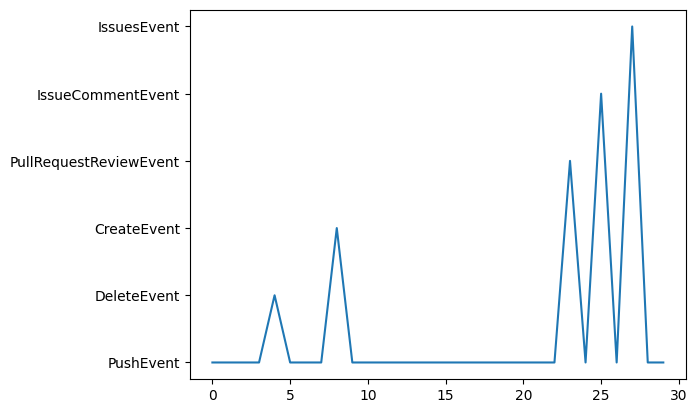

In [ ]:
import matplotlib.pyplot as plt

data_np = data_frame.to_numpy()

x = [i[0] for i in data_np]
y = [i[2] for i in data_np]
# print(x)
# print(y)
figure, axes = plt.subplots()
axes.plot(y)
plt.show()

Использование генетических алгоритмов:

In [ ]:
import random

# Количество особей в каждом поколении
POPULATION_SIZE = 100 ## count of string's variants on one iteration

# Валидные гены - items for strings
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Целевая строка для генерации
TARGET = "Carpe diem memento mori"

class Individual(object):
	'''
	Класс, представляющий отдельную особь (индивида) в популяции
	'''
	## object with variant of string

	def __init__(self, chromosome):
		self.chromosome = chromosome      ## current string
		self.fitness = self.cal_fitness() ## how many items need to change

	@classmethod
	def mutated_genes(self):  ## take random item from set of items
		'''
		Создаем случайные гены для мутации
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):   ## make string with randon items with length of TARGET
		'''
		Создаем хромосому - набор генов
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def gene_transfer(self, par2):  ##  make New string with mess of parents strings and random items
		'''
		Передаем гены новому поколению индивидов
		'''

		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			# если вероятность меньше 0,45, берем ген
			# от родителя 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# если вероятность между 0.45 и 0.90, берем
			# ген от родителя 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# в противном случае берем случайный ген (мутация),
			else:
				child_chromosome.append(self.mutated_genes())

		## new string on iteration
		return Individual(child_chromosome)

	def cal_fitness(self): ## how many items need to replace
		'''
		Рассчитываем показатель соответствия, это количество
		символов в строке, которые отличаются от целевой
		строки.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	start_stuck = 0
	where_stuck = 0

	#Текущее поколение
	generation = 1

	found = False
	population = [] ## list of objects on iteration

	# Новое поколение  - init the First iteration
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome() ## make random string
				population.append(Individual(gnome)) ## make object to keep string

	while not found:

		# Отсортируем популяцию в порядке возрастания оценки соответствия целевой функции
		population = sorted(population, key = lambda x:x.fitness)
		## sort objects(strings) from 'higly likely' to 'absolutely wrong'

		# Если у нас появился индивид, достигший целевой функции
		# цикл совершенствования можно прервать
		if population[0].fitness <= 0: ## if most perspective string has nothing to change - done
			found = True
			break

		# В противном случае - продолжаем создавать новые поколения
		new_generation = []

		# Определяем 10% популяции, наиболее соответствующих целевой фукнции
		# чтобы передать их гены будущим поколениям
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s]) ## take as is first 10% strings from all objects  to new iteration

		## fill up new iteration with new cross-made objects
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			# parent1 = random.choice(population[:50]) ## ??? why here used "magic number" = 50
			# parent2 = random.choice(population[:50]) ## what if POPULATION_SIZE will less then 50 ???
			## maybe this way more correct:
			parent1 = random.choice(population[:POPULATION_SIZE // 2])
			parent2 = random.choice(population[:POPULATION_SIZE // 2])

			child = parent1.gene_transfer(parent2)
			new_generation.append(child)

		population = new_generation  ## new iteration to work

		if generation % 2:
			print("Generation: {}\tString: {}\tFitness: {}". format(generation, "".join(population[0].chromosome), population[0].fitness))

		generation += 1

	print("Generation: {}\tString: {}\tFitness: {}".format(generation, "".join(population[0].chromosome), population[0].fitness))

if __name__ == '__main__':
	main()


Generation: 1	String: cm%d"C#Z}V3kDzEztotp_l&	Fitness: 21
Generation: 3	String: cm%d"C#Z}V3kDzEztotp_l&	Fitness: 21
Generation: 5	String: 2;,dD,di,g3)f{/,toj03r)	Fitness: 18
Generation: 7	String: .Xj"DOoinm FL  Dto nH[)	Fitness: 17
Generation: 9	String: Tsvs= dinm7(e{fntoG0HrZ	Fitness: 14
Generation: 11	String: Tsvs= dinm7(e{fntoG0HrZ	Fitness: 14
Generation: 13	String: Tsax= dinm (e$.n$o 0or&	Fitness: 12
Generation: 15	String: Ts,xe di5m (em.noo %HrV	Fitness: 11
Generation: 17	String: Tzase dinm (emfnto 0or&	Fitness: 9
Generation: 19	String: Tzase dinm (emfnto 0or&	Fitness: 9
Generation: 21	String: Ta,xe di_m (em.nto 0orV	Fitness: 8
Generation: 23	String: Taap1 di8m aemento[mor&	Fitness: 7
Generation: 25	String: Taap1 di8m aemento[mor&	Fitness: 7
Generation: 27	String: EaKpe di8m Nemfnto morf	Fitness: 6
Generation: 29	String: -aape diCm 7emento mor&	Fitness: 5
Generation: 31	String: -aape diCm 7emento mor&	Fitness: 5
Generation: 33	String: -aape diCm 7emento mor&	Fitness: 5
Generation:

 Сохранение и совместное использование: